# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
filepath_t = "/Users/balaj/Downloads/QVI_transaction_data.xlsx"
transaction = pd.read_excel(filepath_t)
print("Ready")

Ready


In [7]:
transaction.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [8]:
# info check
transaction.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# Exploratory  Data Analysis


In [9]:
# CORRETCING DATA TYPE
transaction["DATE"] = pd.to_datetime(transaction["DATE"], origin="1899-12-30",unit="D")
transaction['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [15]:
# REMOVING IRRELAVENT VALUES
transaction["PROD_NAME"].describe()


count                                     246742
unique                                       105
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [16]:
# REMOVING SALSA PRODUCTS ONLY FOCUSING ON CHIPS
transaction = transaction[~transaction["PROD_NAME"].str.contains("[Ss]alsa")]

In [17]:
import re
PROD_word_only = transaction["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

# CALCULATE FREQUENCY GROUPED BY WORDS AND SORT
PROD_freq = pd.value_counts([word for name in PROD_word_only
                                for word in name]).sort_values(ascending=False)  
PROD_freq.head()

175g      60561
Chips     49770
Kettle    41288
150g      38705
&         34107
Name: count, dtype: int64

In [18]:
# CHECK FOR MISSING VALUES
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

<Axes: >

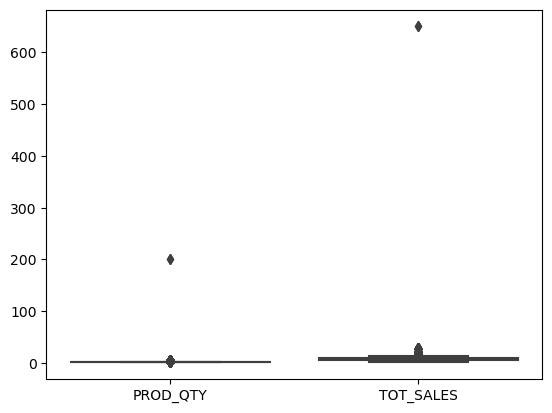

In [19]:
sns.boxplot(data=transaction.loc[:,["PROD_QTY","TOT_SALES"]])

There are no null values present in the columns. However, there seems to be an outlier in the product quantity column, specifically in the instance where 200 packets of chips were purchased in a single transaction. Further investigation into this outlier is warranted.

In [20]:
# Look for outlier
transaction.loc[transaction["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


only two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer

In [21]:
transaction.loc[transaction["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [22]:
# Filter out the customer based on the loyalty card number

transaction = transaction.drop(index=[69762,69763])

# Re-examine transaction data

transaction.loc[transaction["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [23]:
# Count the number of transactions by date
trans_by_date = transaction.groupby(["DATE"]).count()
trans_by_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


In [24]:
# Create a summary of transaction count by date
trans_by_date.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143
std,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from july 1 2018 to 30 june 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [30]:
# Create a sequence of dates and join this the count of transactions by date
# Create a column of dates that includes every day from 1 July 2018 to30 june 2019
dates_seq = pd.date_range("2018-06-01","2019-05-30")

# Join it onto the data to fill in the missing day.
fill_dates = trans_by_date.reindex(dates_seq)
fill_dates

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-05-26,648.0,648.0,648.0,648.0,648.0,648.0,648.0
2019-05-27,665.0,665.0,665.0,665.0,665.0,665.0,665.0
2019-05-28,683.0,683.0,683.0,683.0,683.0,683.0,683.0
2019-05-29,714.0,714.0,714.0,714.0,714.0,714.0,714.0


In [31]:
fill_dates.index.difference(transaction["DATE"])

DatetimeIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12',
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16',
               '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20',
               '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24',
               '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28',
               '2018-06-29', '2018-06-30', '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

In [33]:
# It seems like the missing day
fill_dates.loc['2018-12-25',:]

STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

Text(0, 0.5, 'Transaction')

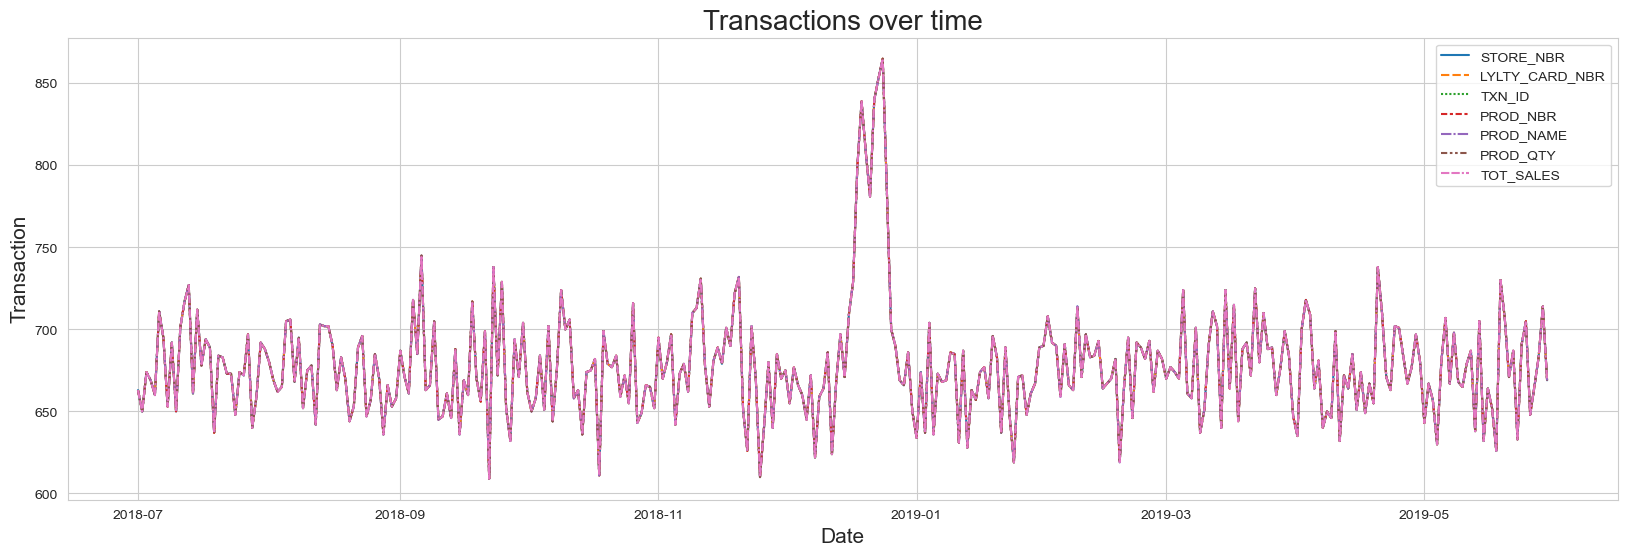

In [61]:
# Plot transactions over time
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.title("Transactions over time",fontsize=20)
sns.lineplot(data=fill_dates)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

We can see that there is an increase in purchases in December and also a big decrease in late December

Text(0, 0.5, 'Transaction')

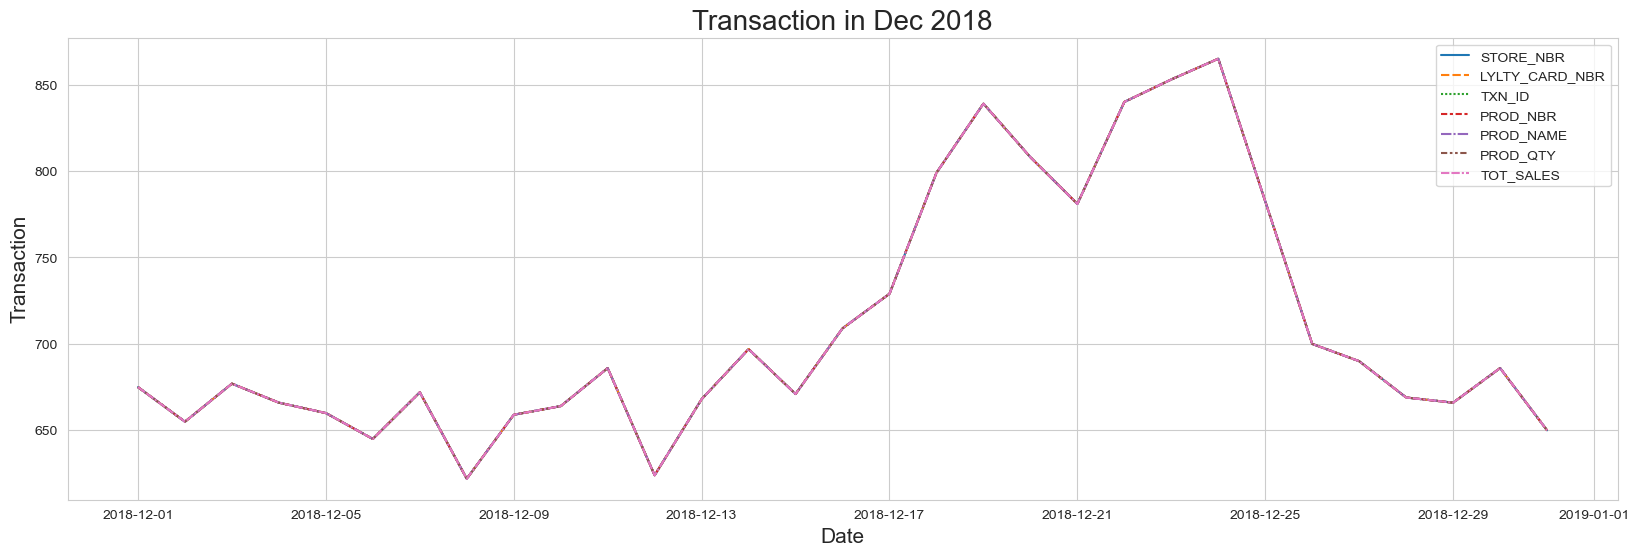

In [35]:
# Zoom in to December and look at individual days
plt.figure(figsize=(20,6))
plt.title("Transaction in Dec 2018",fontsize=20)
sns.lineplot(data=fill_dates.loc['2018-12-01':'2018-12-31',:])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

we will not treat this point as an outlier. Now we can move on to create other features such as brand of chips or pack size from PROD_NAME.

In [36]:
# Start with pack size
# Taking the digits that are in PROD_NAME
transaction["PACK_SIZE"] = transaction["PROD_NAME"].str.extract("([0-9]+)").astype("float")
transaction["PACK_SIZE"].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

In [37]:
# Descriptive statistics of PACK_SIZE
transaction["PACK_SIZE"].describe()

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

Text(0, 0.5, 'Number of Transactions')

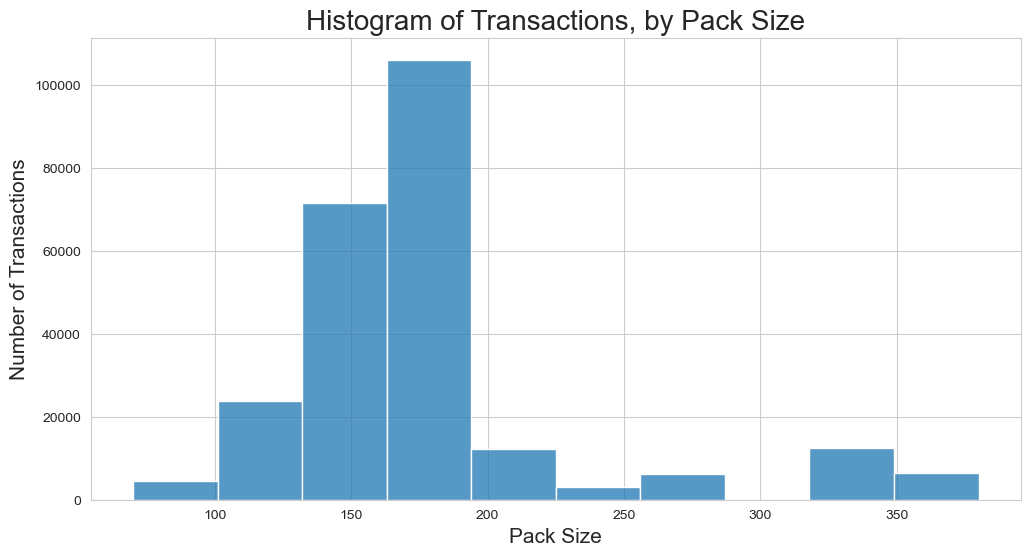

In [38]:
# Plot a histogram showing the number of transactions by pack size
plt.figure(figsize=(12,6))
sns.histplot(x=transaction["PACK_SIZE"], bins=10, kde=False)
plt.title("Histogram of Transactions, by Pack Size",fontsize=20)
plt.xlabel("Pack Size",fontsize=15)
plt.ylabel("Number of Transactions",fontsize=15)

ince they are mostly concentrated between 150 and 200, which is a common sizE

In [39]:
# Now to create brands, we can use the first word in PROD_NAME 
transaction["BRAND"] = transaction["PROD_NAME"].str.split().str[0]
transaction["BRAND"].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [40]:
# Check their names
bd = transaction["BRAND"].unique()
bd.sort()
bd

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

Some of the brand names look like they are of the same brands such as

Dorito and Doritos
Grain and GrnWves 
Infuzions and Infzns
NCC and Natural 
Red and RRD
Smith and Smiths
Snbts and Sunbites
WW and Woolworths

 combine these together.

In [44]:
# Check brands which are not sure
transaction["PROD_NAME"].loc[transaction["BRAND"]=="Red"].head()

28        Red Rock Deli Thai  Chilli&Lime 150g
34     Red Rock Deli Sp    Salt & Truffle 150G
212    Red Rock Deli Sp    Salt & Truffle 150G
297       Red Rock Deli Thai  Chilli&Lime 150g
331    Red Rock Deli Sp    Salt & Truffle 150G
Name: PROD_NAME, dtype: object

In [45]:
# Clean brand names
def rename_brand(new,old):
    transaction["BRAND"].loc[transaction["BRAND"]==old] = new

rename_brand("Doritos","Dorito")
rename_brand("Grain Waves","Grain")
rename_brand("Grain Waves","GrnWves")
rename_brand("Infuzions","Infzns")
rename_brand("Natural Chip Co","NCC")
rename_brand("Natural Chip Co","Natural")
rename_brand("Red Rock Deli","Red")
rename_brand("Red Rock Deli","RRD")
rename_brand("Smiths","Smith")
rename_brand("Sunbites","Snbts")
rename_brand("Woolworths","WW")

# Check results
nbd = transaction["BRAND"].unique()
nbd.sort()
nbd

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

Text(0.5, 0, 'Transaction')

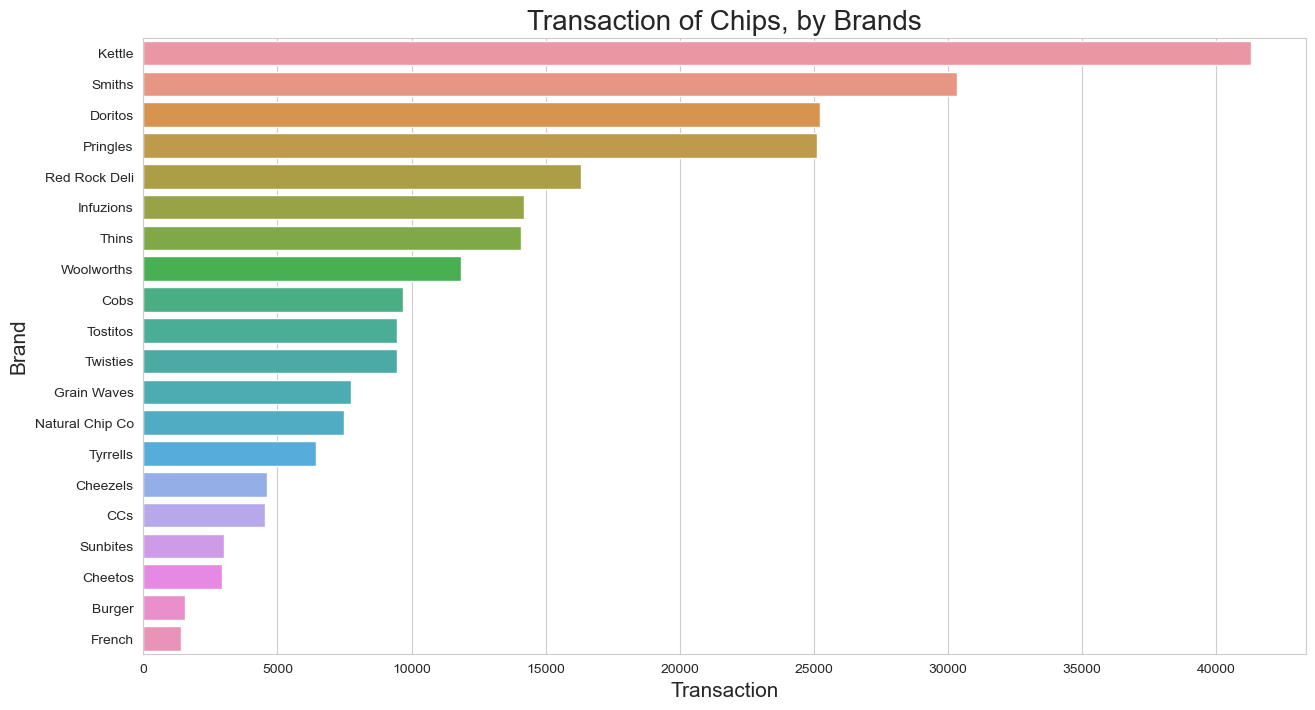

In [47]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize=(15,8))
sns.barplot(x = transaction["BRAND"].value_counts(),y=transaction["BRAND"].value_counts().index)
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

FROM THE CHART WE SEE THAT KETTLE HAS THE MOST TRANSACTION AND POPULAR CHIPS BRAND

# EXAMINE THE CUSTOMER DATA OF PURCHASE BEHAVIOUR

In [50]:
# Read data
filepath_c = "/Users/balaj/Downloads/QVI_purchase_behaviour.csv"
customer = pd.read_csv(filepath_c)
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [52]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [53]:
customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


Text(0.5, 1.15, 'Distribution of Lifestage')

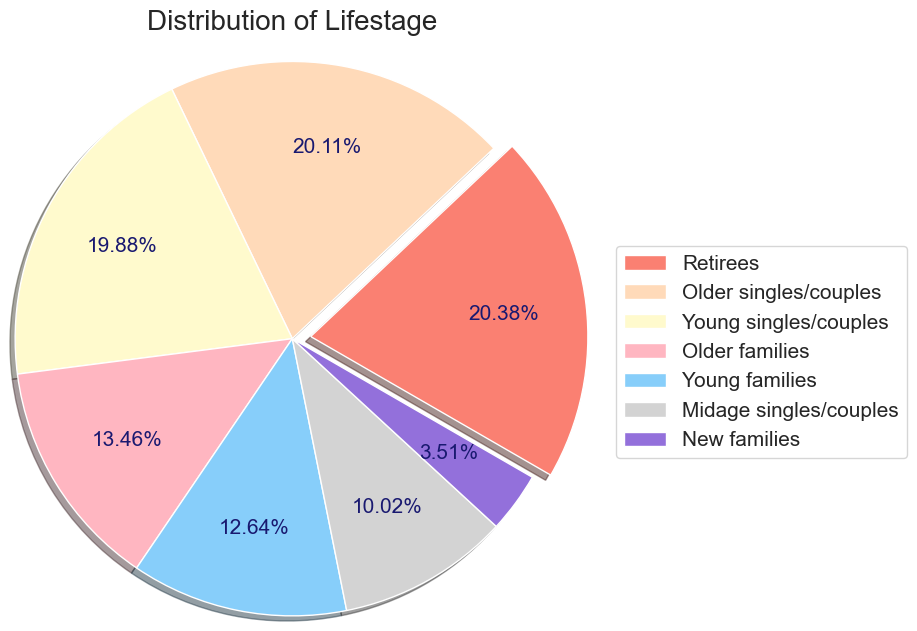

In [54]:
#Let's see the distribution of Lifestage & Customer type by using pie chart

# Plot a pie chart of LIFESTAGE
plt.figure(figsize=(6,6))
colors = ['salmon', 'peachpuff', 'lemonchiffon', 'lightpink', 'lightskyblue','lightgrey','mediumpurple']
plt.pie(customer["LIFESTAGE"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0,0,0,0,0),
                                              textprops= {'fontsize':15,'color':'midnightblue'},
                                              radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(customer["LIFESTAGE"].value_counts().index.str.capitalize(), fontsize=15,
                                                                        loc=2, 
                                                                        bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Lifestage", y=1.15, fontsize=20)

Text(0.5, 1.15, 'Distribution of Customer Type')

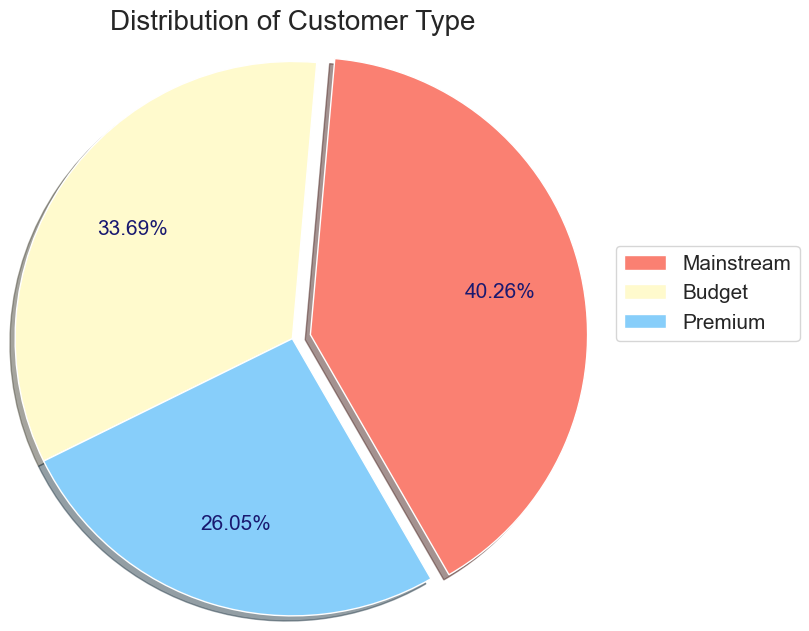

In [55]:
# Plot a pie chart of PREMIUM_CUSTOMER
plt.figure(figsize=(6,6))
colors = ['salmon', 'lemonchiffon', 'lightskyblue']
plt.pie(customer["PREMIUM_CUSTOMER"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0),
                                                     textprops= {'fontsize':15,'color':'midnightblue'},
                                                     radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(customer["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,
                                                       loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Customer Type", y=1.15, fontsize=20)

There are 72637 customer sample in this table. Among these customers, the majority are retirees, 20.38%, while the number of new families is the least, only 3.51%. For customer type, Mainstream customers account for the largest proportion，followed by Budget customers, and finally by the Premium customers.

In [56]:
# Merge transaction data to customer data
merge_data = pd.merge(transaction,customer,on="LYLTY_CARD_NBR")
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [57]:
merge_data.count()

DATE                246740
STORE_NBR           246740
LYLTY_CARD_NBR      246740
TXN_ID              246740
PROD_NBR            246740
PROD_NAME           246740
PROD_QTY            246740
TOT_SALES           246740
PACK_SIZE           246740
BRAND               246740
LIFESTAGE           246740
PREMIUM_CUSTOMER    246740
dtype: int64

In [58]:
# Check if some customers were not matched on by checking for nulls
merge_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [59]:
# save as csv
merge_data.to_csv("merge_data.csv")

In [63]:
#  Calculate the total sales by those dimensions
totsales_l_p = pd.DataFrame(merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum())
totsales_l_p

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

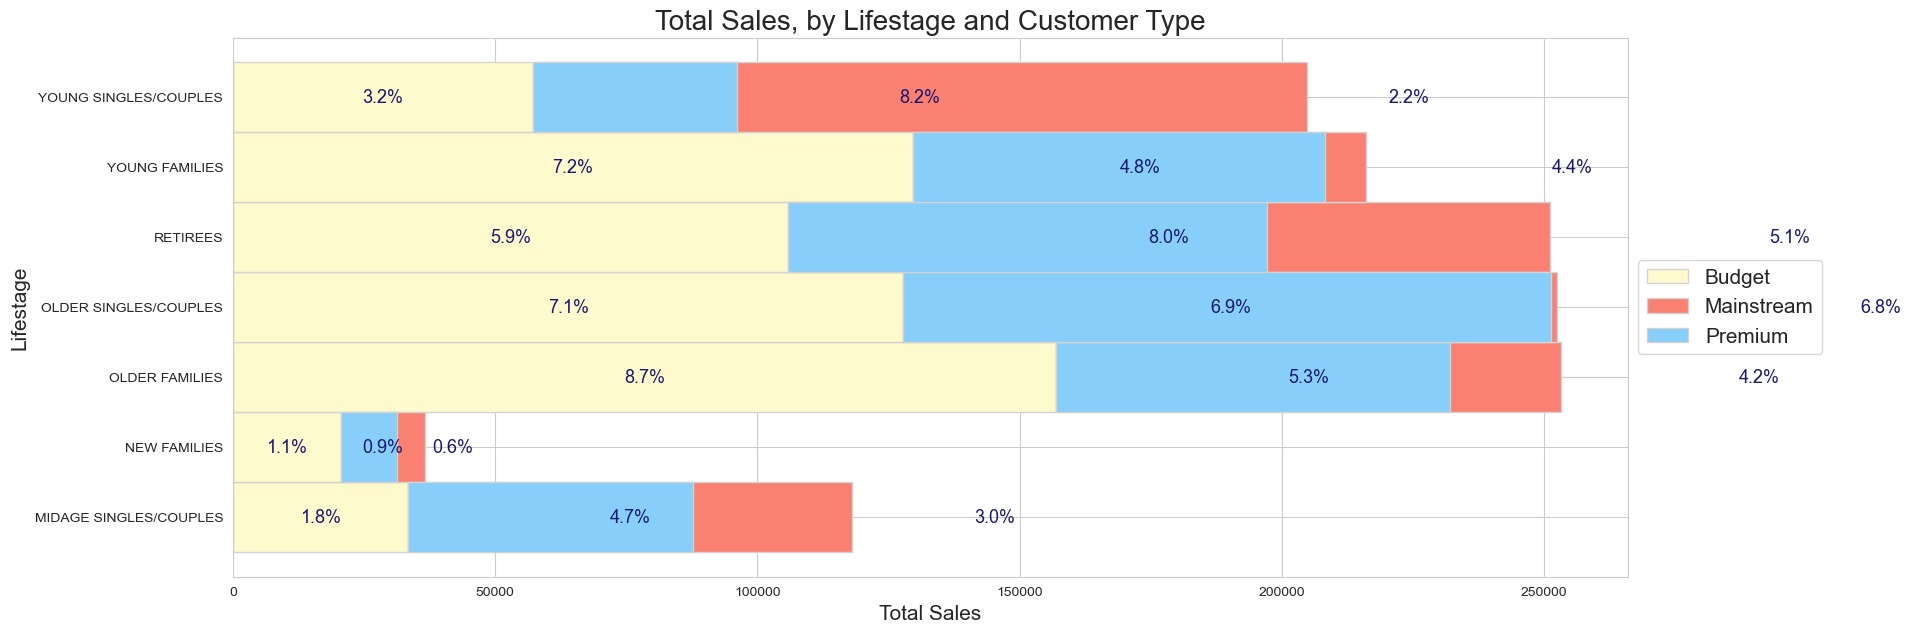

In [72]:
# Plot to show total sales in each customer segement
# from https://github.com/kevwij/insidesherpa_quantium_virtual-experience/blob/master/Quantium%20-%20Module%201.ipynb
# Values of each group
bars1 = totsales_l_p[totsales_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["TOT_SALES"]
bars2 = totsales_l_p[totsales_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["TOT_SALES"]
bars3 = totsales_l_p[totsales_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["TOT_SALES"]
 
bars1_text = (bars1 / sum(totsales_l_p["TOT_SALES"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(totsales_l_p["TOT_SALES"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(totsales_l_p["TOT_SALES"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = totsales_l_p.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

In [73]:
#  Calculate the customer count in each segment
count_l_p = pd.DataFrame(customer.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).count())
count_l_p.columns=["CUSTOMER_COUNTS"]
count_l_p

CUSTOMER_COUNTS
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                       1504
                       Mainstream                   3340
                       Premium                      2431
NEW FAMILIES           Budget                       1112
                       Mainstream                    849
                       Premium                       588
OLDER FAMILIES         Budget                       4675
                       Mainstream                   2831
                       Premium                      2274
OLDER SINGLES/COUPLES  Budget                       4929
                       Mainstream                   4930
                       Premium                      4750
RETIREES               Budget                       4454
                       Mainstream                   6479
                       Premium                      3872
YOUNG FAMILIES         Budget                       4017
                       Mainstream                   2728
                       Premium                      2433
YOUNG SINGLES/COUPLES  Budget                       3779
                       Mainstream                   8088
                       Premium                      2574

In [74]:
# Calculate the average number of units per customer by those two dimensions
merge_l_p = pd.merge(totsales_l_p,count_l_p,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
merge_l_p['SALES_QTY'] = merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
merge_l_p['AVG_SALES_QTY'] = (merge_l_p["SALES_QTY"]/merge_l_p["CUSTOMER_COUNTS"])
merge_l_p

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70             1504   
                       Mainstream         84734.25             3340   
                       Premium            54443.85             2431   
NEW FAMILIES           Budget             20607.45             1112   
                       Mainstream         15979.70              849   
                       Premium            10760.80              588   
OLDER FAMILIES         Budget            156863.75             4675   
                       Mainstream         96413.55             2831   
                       Premium            75242.60             2274   
OLDER SINGLES/COUPLES  Budget            127833.60             4929   
                       Mainstream        124648.50             4930   
                       Premium           123537.55             4750   
RETIREES               Budget            105916.30             4454   
                       Mainstream        145168.95             6479   
                       Premium            91296.65             3872   
YOUNG FAMILIES         Budget            129717.95             4017   
                       Mainstream         86338.25             2728   
                       Premium            78571.70             2433   
YOUNG SINGLES/COUPLES  Budget             57122.10             3779   
                       Mainstream        147582.20             8088   
                       Premium            39052.30             2574   

                                         SALES_QTY  AVG_SALES_QTY  
LIFESTAGE              PREMIUM_CUSTOMER                            
MIDAGE SINGLES/COUPLES Budget                 8883       5.906250  
                       Mainstream            21213       6.351198  
                       Premium               14400       5.923488  
NEW FAMILIES           Budget                 5241       4.713129  
                       Mainstream             4060       4.782097  
                       Premium                2769       4.709184  
OLDER FAMILIES         Budget                41853       8.952513  
                       Mainstream            25804       9.114800  
                       Premium               20239       8.900176  
OLDER SINGLES/COUPLES  Budget                32883       6.671333  
                       Mainstream            32607       6.613996  
                       Premium               31695       6.672632  
RETIREES               Budget                26932       6.046700  
                       Mainstream            37677       5.815249  
                       Premium               23266       6.008781  
YOUNG FAMILIES         Budget                34482       8.584018  
                       Mainstream            23194       8.502199  
                       Premium               20901       8.590629  
YOUNG SINGLES/COUPLES  Budget                15500       4.101614  
                       Mainstream            36225       4.478858  
                       Premium               10575       4.108392

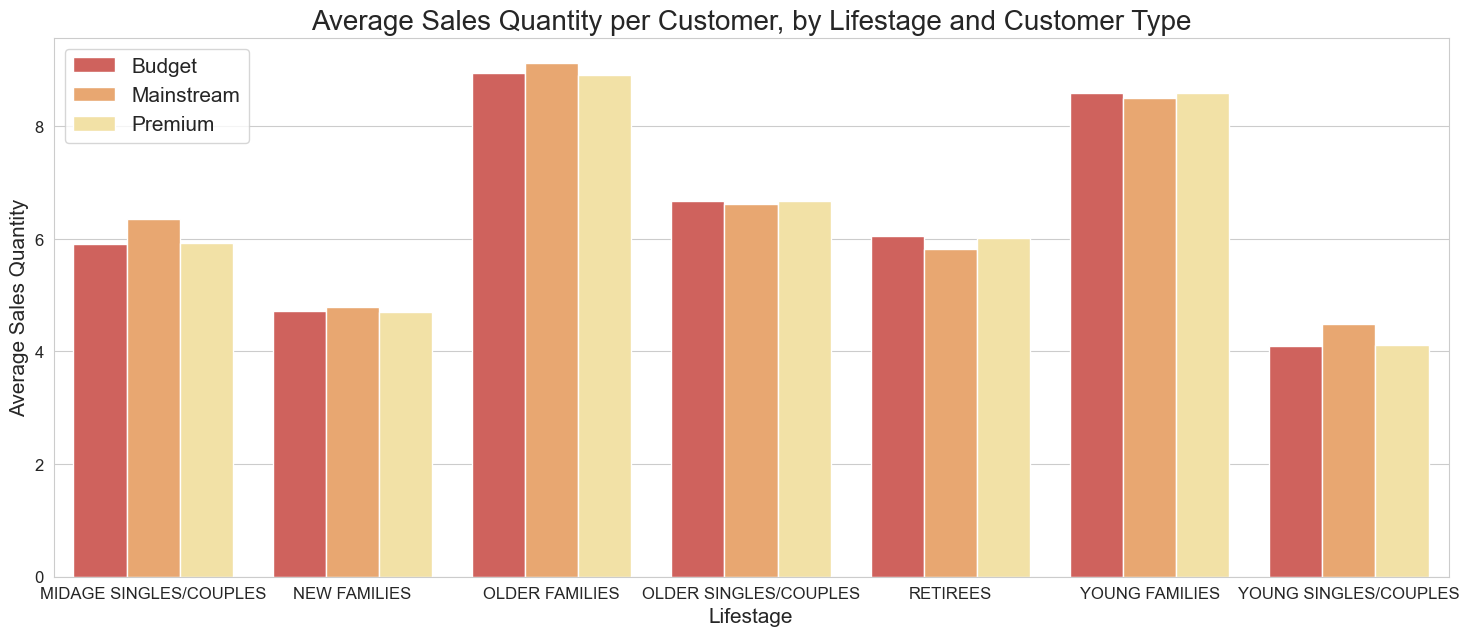

In [82]:
plt.figure(figsize=(18, 7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_l_p.reset_index()["LIFESTAGE"], y=merge_l_p.reset_index()["AVG_SALES_QTY"], 
            hue=merge_l_p.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Spectral"), ci=None)
plt.title("Average Sales Quantity per Customer, by Lifestage and Customer Type", fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(0.14, 0.98), borderaxespad=0.)
plt.xlabel("Lifestage", fontsize=15)
plt.ylabel("Average Sales Quantity", fontsize=15)
plt.show()



In [83]:
# Calculate the average price per unit sold (average sale price) by those two customer dimensions
merge_l_p['AVG_SALES_PRICE'] = (merge_l_p["TOT_SALES"]/merge_l_p["SALES_QTY"])
merge_l_p

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70             1504   
                       Mainstream         84734.25             3340   
                       Premium            54443.85             2431   
NEW FAMILIES           Budget             20607.45             1112   
                       Mainstream         15979.70              849   
                       Premium            10760.80              588   
OLDER FAMILIES         Budget            156863.75             4675   
                       Mainstream         96413.55             2831   
                       Premium            75242.60             2274   
OLDER SINGLES/COUPLES  Budget            127833.60             4929   
                       Mainstream        124648.50             4930   
                       Premium           123537.55             4750   
RETIREES               Budget            105916.30             4454   
                       Mainstream        145168.95             6479   
                       Premium            91296.65             3872   
YOUNG FAMILIES         Budget            129717.95             4017   
                       Mainstream         86338.25             2728   
                       Premium            78571.70             2433   
YOUNG SINGLES/COUPLES  Budget             57122.10             3779   
                       Mainstream        147582.20             8088   
                       Premium            39052.30             2574   

                                         SALES_QTY  AVG_SALES_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                 8883       5.906250   
                       Mainstream            21213       6.351198   
                       Premium               14400       5.923488   
NEW FAMILIES           Budget                 5241       4.713129   
                       Mainstream             4060       4.782097   
                       Premium                2769       4.709184   
OLDER FAMILIES         Budget                41853       8.952513   
                       Mainstream            25804       9.114800   
                       Premium               20239       8.900176   
OLDER SINGLES/COUPLES  Budget                32883       6.671333   
                       Mainstream            32607       6.613996   
                       Premium               31695       6.672632   
RETIREES               Budget                26932       6.046700   
                       Mainstream            37677       5.815249   
                       Premium               23266       6.008781   
YOUNG FAMILIES         Budget                34482       8.584018   
                       Mainstream            23194       8.502199   
                       Premium               20901       8.590629   
YOUNG SINGLES/COUPLES  Budget                15500       4.101614   
                       Mainstream            36225       4.478858   
                       Premium               10575       4.108392   

                                         AVG_SALES_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                   
MIDAGE SINGLES/COUPLES Budget                   3.753878  
                       Mainstream               3.994449  
                       Premium                  3.780823  
NEW FAMILIES           Budget                   3.931969  
                       Mainstream               3.935887  
                       Premium                  3.886168  
OLDER FAMILIES         Budget                   3.747969  
                       Mainstream               3.736380  
                       Premium                  3.717703  
OLDER SINGLES/COUPLES  Budget                   3.887529  
                       Mainstream               3.822753  
                       Premium                  3.89

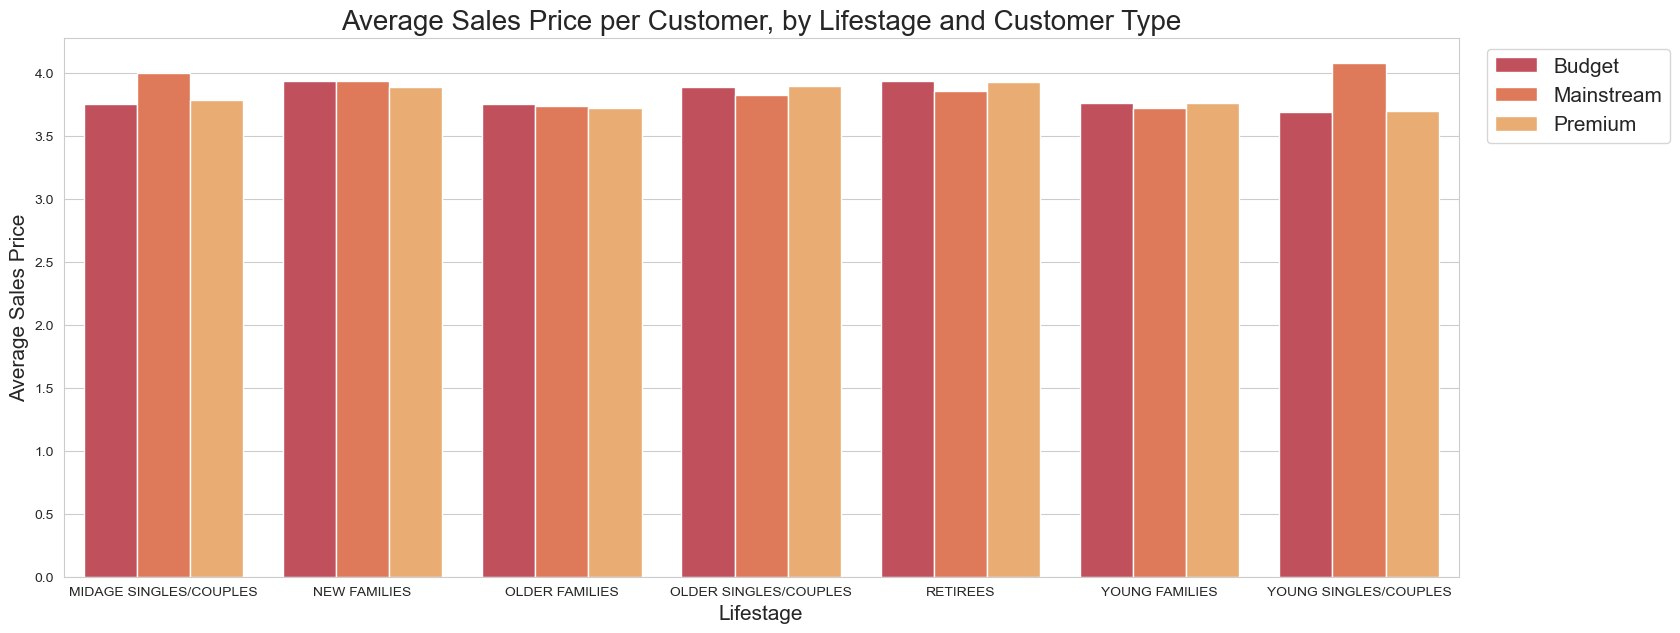

In [87]:
plt.figure(figsize=(18, 7))
sns.barplot(x=merge_l_p.reset_index()["LIFESTAGE"], y=merge_l_p.reset_index()["AVG_SALES_PRICE"], 
            hue=merge_l_p.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Spectral", 9))
plt.title("Average Sales Price per Customer, by Lifestage and Customer Type", fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.02, 0.98), borderaxespad=0.)
plt.xlabel("Lifestage", fontsize=15)
plt.ylabel("Average Sales Price", fontsize=15)
plt.show()


Mainstream midage and young singles/couples exhibit a higher propensity to spend on a per-packet basis for chips compared to individuals in the budget and premium segments. This inclination may stem from premium shoppers' preference for healthier snack options, leading to chips being purchased primarily for recreational purposes rather than personal consumption. Furthermore, the observation of fewer purchases of chips among premium midage and young singles/couples compared to their mainstream counterparts reinforces this trend.

# STATISTICS

In [88]:
from scipy import stats
# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
new_merge=merge_l_p.reset_index()
mainstream = new_merge.loc[new_merge["PREMIUM_CUSTOMER"]=="Mainstream"]
others = new_merge.loc[(new_merge["PREMIUM_CUSTOMER"]=="Premium")|(new_merge["PREMIUM_CUSTOMER"]=="Budget")]
main_mid_young = mainstream["AVG_SALES_PRICE"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]
others_mid_young = others["AVG_SALES_PRICE"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]

In [89]:
# Homogeneity of variance test
stats.levene(main_mid_young,others_mid_young)

LeveneResult(statistic=0.00490158871698384, pvalue=0.9475450406225323)

In [90]:
# Independent T-test
stats.ttest_ind(main_mid_young,others_mid_young, equal_var=False)

TtestResult(statistic=6.635796901874541, pvalue=0.031128004009301317, df=1.7352652705729508)

In [91]:
# Brands and package sizes of 'Mainstream - young singles/couples' Segment and other segments
s = pd.DataFrame(merge_data.loc[:,["LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","BRAND","PACK_SIZE","PROD_QTY"]])
m_ysc = s[(s["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(s["PREMIUM_CUSTOMER"]=="Mainstream")]
m_ysc.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE,PROD_QTY
221345,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,150.0,1
221346,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,330.0,1
221347,1020,YOUNG SINGLES/COUPLES,Mainstream,Grain Waves,180.0,1
221348,1163,YOUNG SINGLES/COUPLES,Mainstream,Kettle,175.0,1
221349,1163,YOUNG SINGLES/COUPLES,Mainstream,Natural Chip Co,175.0,1


In [92]:
# Most popular brands
m_ysc["BRAND"].value_counts().head(5)

BRAND
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: count, dtype: int64

In [93]:
m_ysc["PACK_SIZE"].value_counts().head(5)

PACK_SIZE
175.0    4997
150.0    3080
134.0    2315
110.0    2051
170.0    1575
Name: count, dtype: int64

# The best-selling brands in 'Mainstream - young singles/couples' Segment are Kettle, Doritos, and Pringles.
For package sizes, 175g, 150g, and 134g are the most popular choices.